In [3]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.ensemble import RandomForestClassifier
from skimage.feature import greycomatrix, greycoprops
from sklearn import metrics
from sklearn.model_selection import cross_val_score


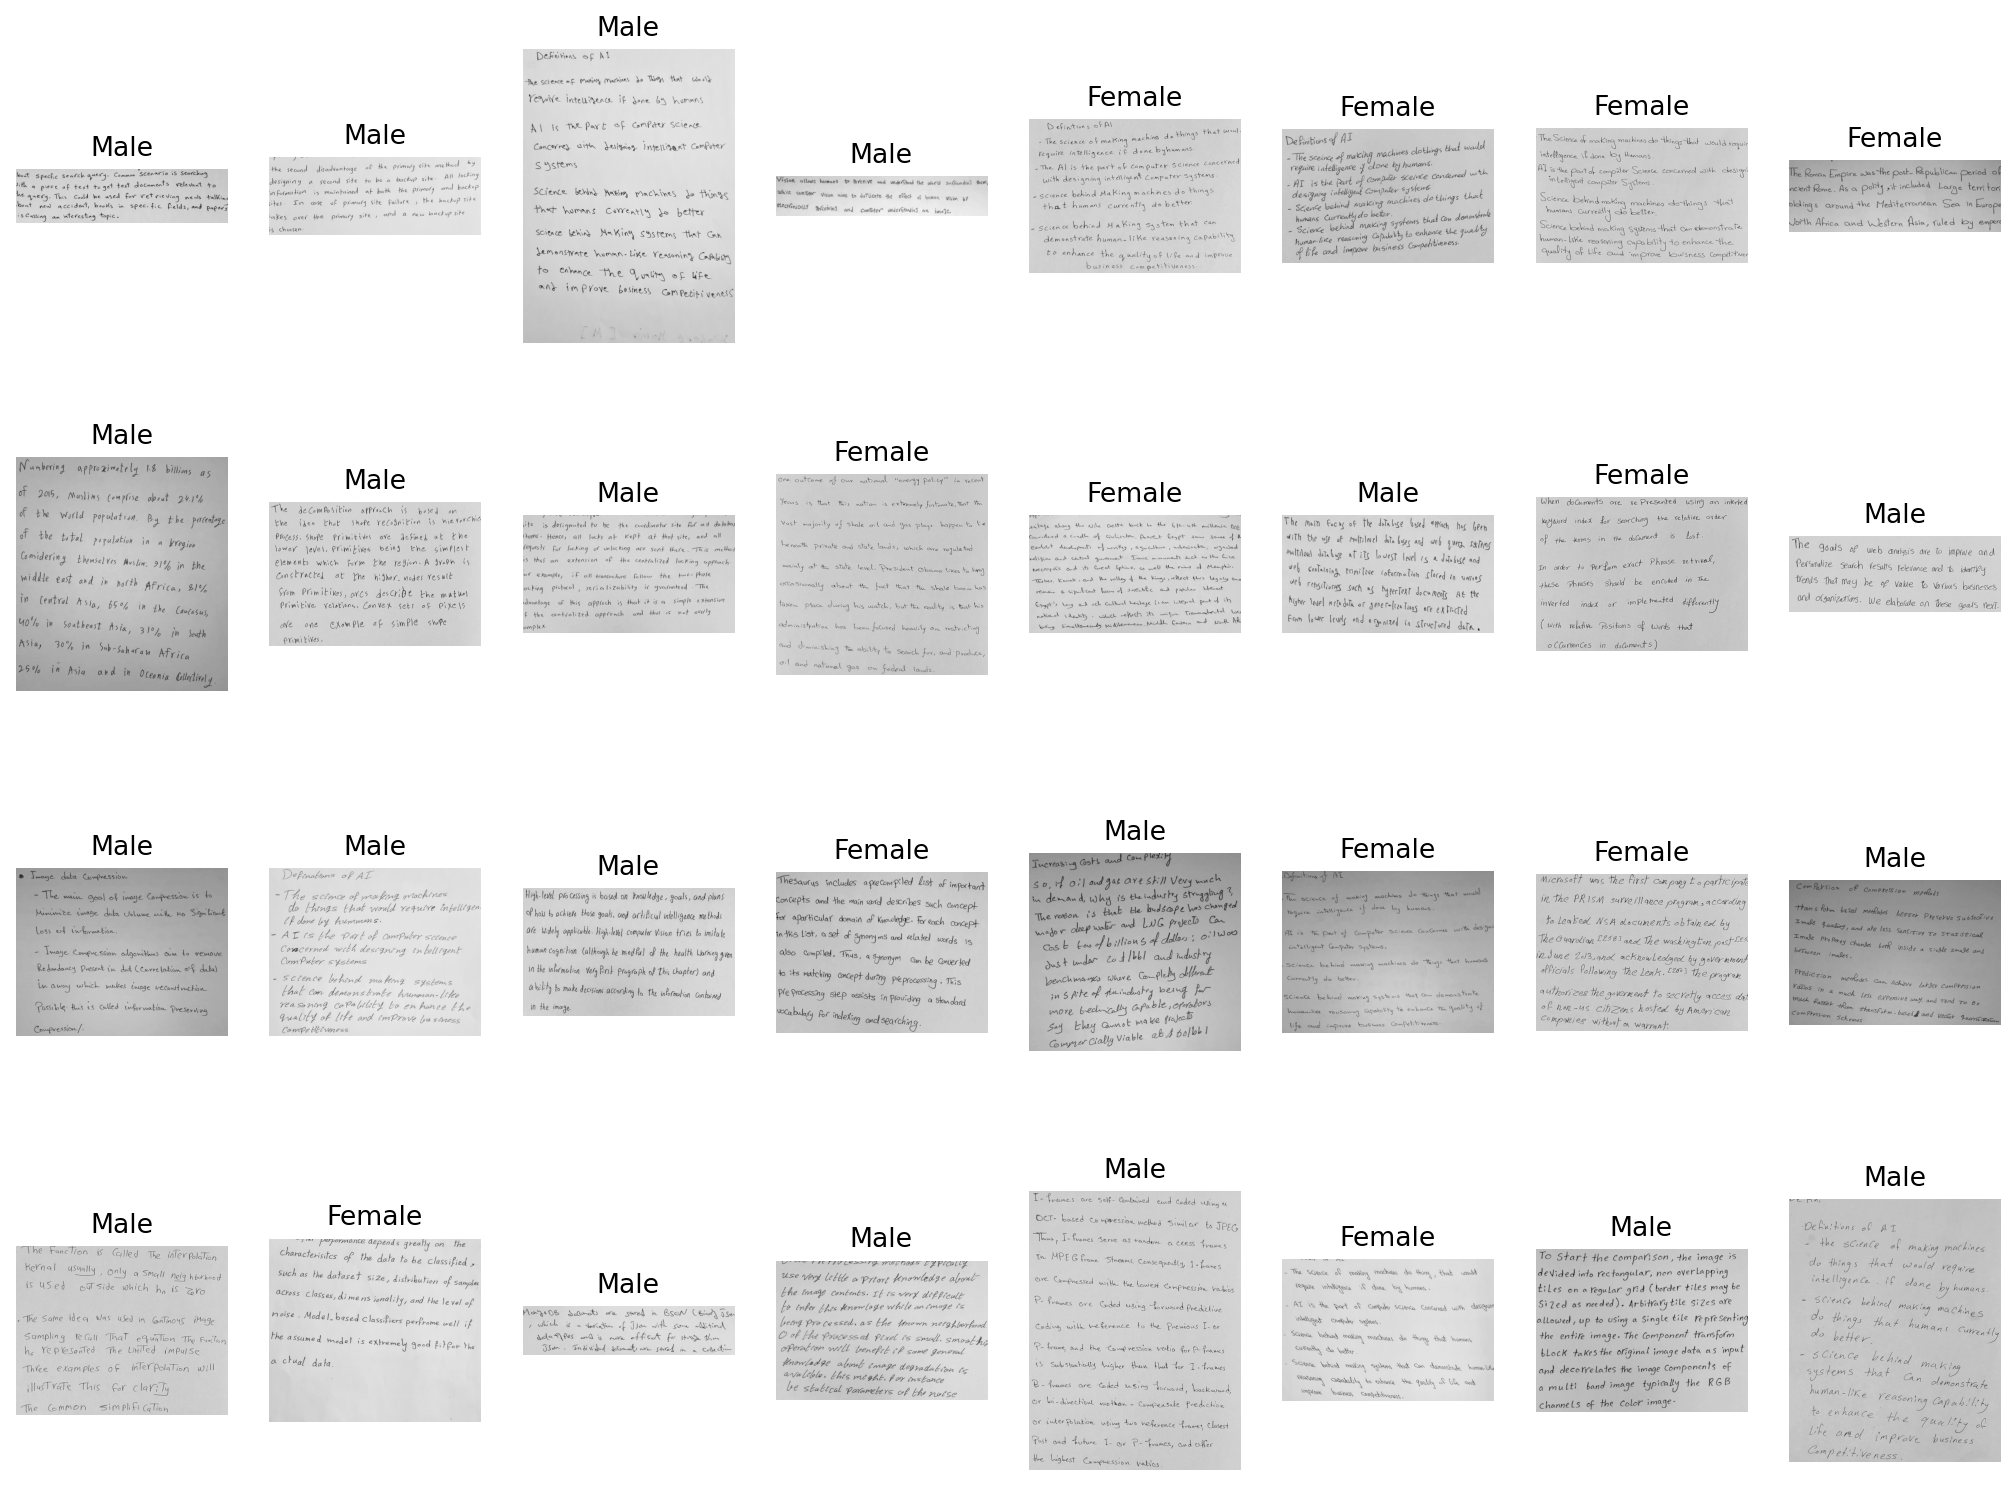

 length of training set is 271
 length of validation set is 91


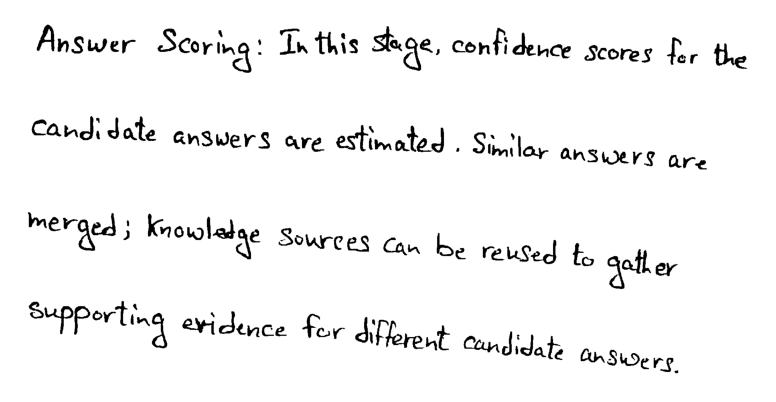

 At 0.0

/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T/ipykernel_15255/2011990972.py:33: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(box_sizes), np.log(partial_box_counts), 1)


 At 0.9963099630996319756(271, 12) (271,)


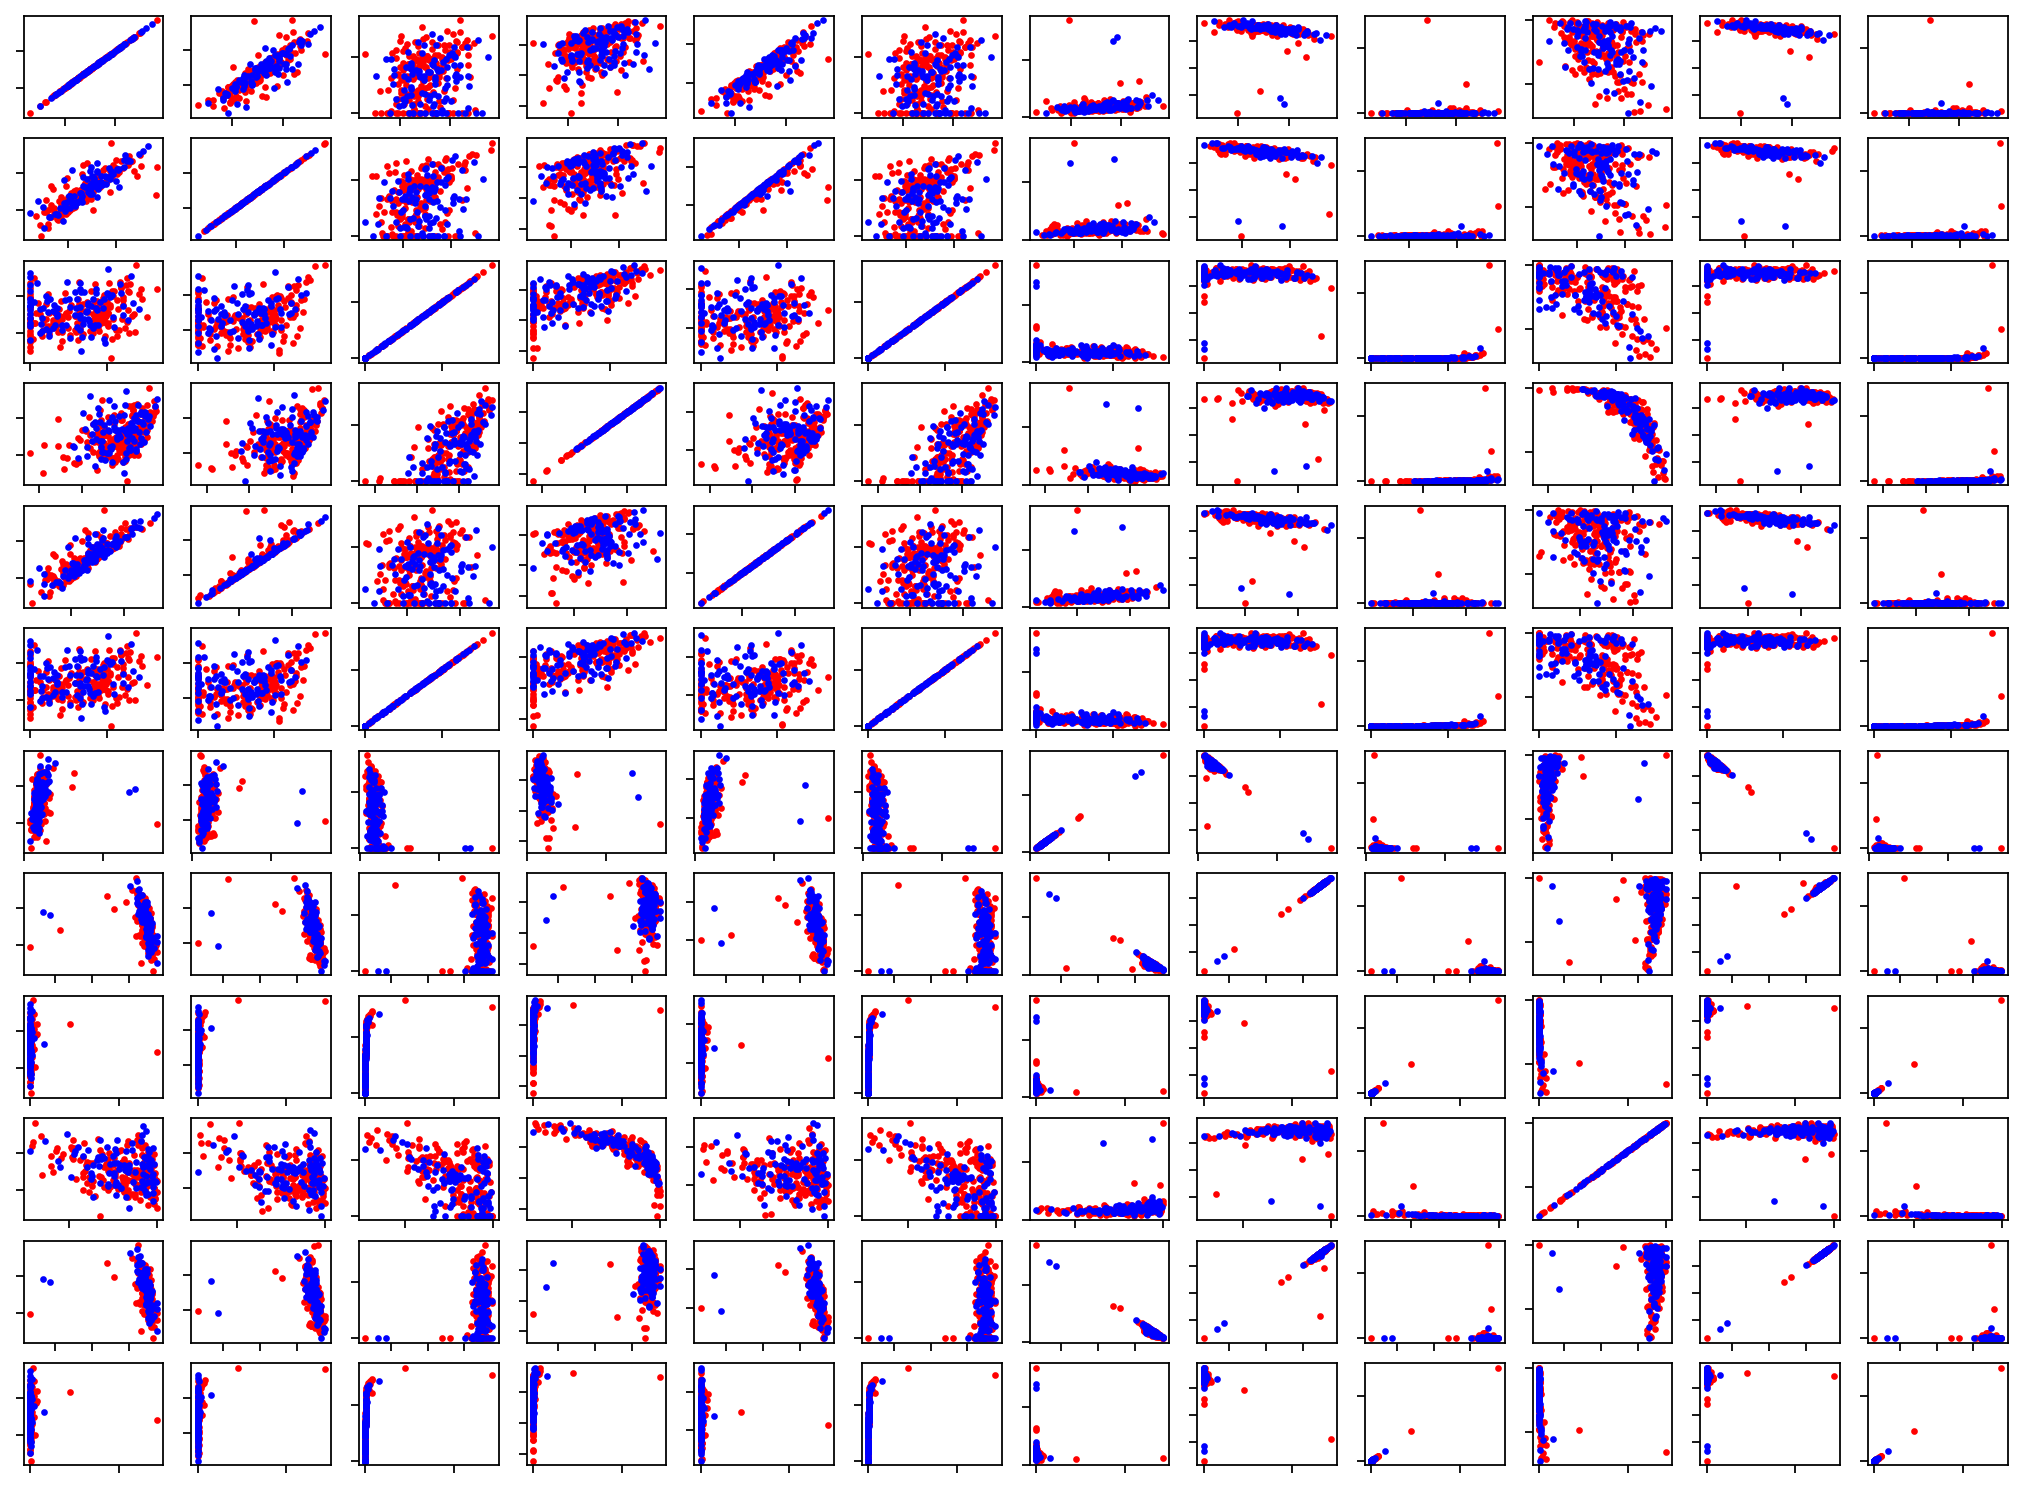

/var/folders/nq/f_nplzp52qx_hrrhyg44xf4c0000gn/T/ipykernel_15255/2694488313.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


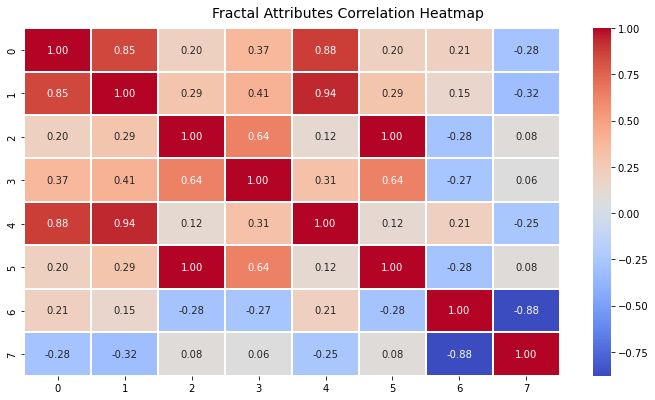

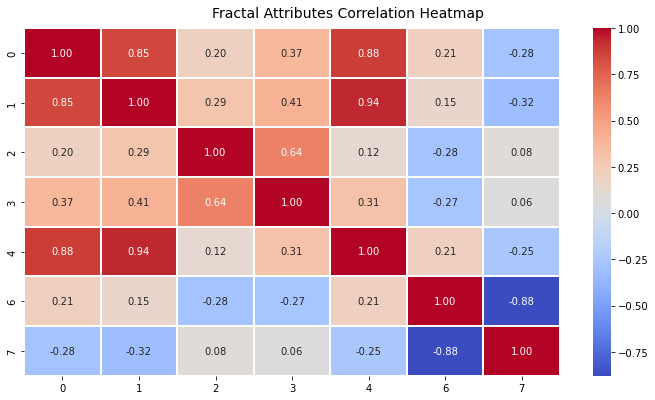

In [4]:
%run ../Features/FindFractalFeatures.ipynb

In [ ]:
%run ../Features/FindHogFeatures.ipynb

## Random Forest - Training

In [5]:
# Boost 100 weak decision trees
model = RandomForestClassifier(n_estimators=100)
#GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

model = model.fit(x_train, y_train)

In [ ]:
# Boost 100 weak decision trees for HOG feature
modelHOG = RandomForestClassifier(n_estimators=100)

modelHOG = modelHOG.fit(data_train, y_train)


## Random Forest - Testing

In [ ]:
predictions = modelHOG.predict(data_test)
print(metrics.accuracy_score(y_test, predictions) * 100)

In [6]:
predictions = model.predict(x_test)
acc = {metrics.accuracy_score(y_test, predictions) * 100}
print(f" Model Accuracy is {acc}")

 Model Accuracy is {63.73626373626373}


## The Random Forest - ES Test 

In [7]:
accs=[]
for i in tqdm(range(500)):
	model = RandomForestClassifier(n_estimators=100)
	model = model.fit(x_train, y_train)
	predictions = model.predict(x_test)
	accs.append(metrics.accuracy_score(y_test, predictions) * 100)
print(f" Model Accuracy is {np.mean(accs)}")



100%|██████████| 500/500 [00:47<00:00, 10.50it/s]

 Model Accuracy is 65.92967032967033


## Cross Validation

In [9]:
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

accuracies = []

for i in tqdm(range(1, 200)):
   p = np.random.permutation(len(x_data))
   x_data = x_data[p]
   y_data = y_data[p]
   model = RandomForestClassifier(n_estimators=300)
   scores = cross_val_score(model, x_data, y_data, cv=5)
   accuracies.append(scores.mean() * 100)

accuracies = np.array(accuracies)
print(f" Model Accuracy by Cross Validation is {np.mean(accuracies)}%")


100%|██████████| 99/99 [02:20<00:00,  1.42s/it]

 Model Accuracy by Cross Validation is 59.16755069723106%
